<a href="https://colab.research.google.com/github/DarkFart21/Embedded-Systems-Project-Group-12/blob/main/Week2_Mathematical_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier Series Implementation**


### **Practical Implementation of Fourier analysis on sensor data**

Implementation of Fourier analysis on sensor data of our project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Sample sensor readings (ΔV and ΔH from LDRs)
delta_v = [-307, -159, 48, 40, 14, -129, -98, 58, 19]
delta_h = [-13, -167, -374, -370, -344, -199, -229, -382, -369]

# Time vector (assuming uniform 1-second intervals between samples)
t = np.arange(len(delta_v))

### **Time-frequency domain transformation**
Here we compute the Fourier Transform (FFT) to convert the sensor signals from time domain to frequency domain.

Text(0, 0.5, 'ΔV')

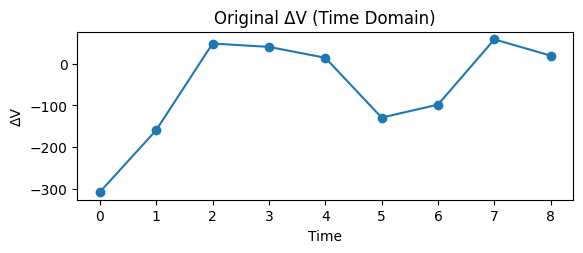

In [39]:
# Compute FFT to get frequency components
fft_v = fft(delta_v)
fft_h = fft(delta_h)

# Compute corresponding frequencies
freq = np.fft.fftfreq(len(t), d=1)  # d=1 assumes 1 Hz sampling

# Compute magnitude of the FFT (amplitude spectrum)
mag_v = np.abs(fft_v)
mag_h = np.abs(fft_h)

# ΔV Time-Domain (Original)
plt.subplot(2, 1, 1)
plt.plot(t, delta_v, marker='o')
plt.title("Original ΔV (Time Domain)")
plt.xlabel("Time")
plt.ylabel("ΔV")

Time to Frequency Conversion

Text(0, 0.5, 'Amplitude')

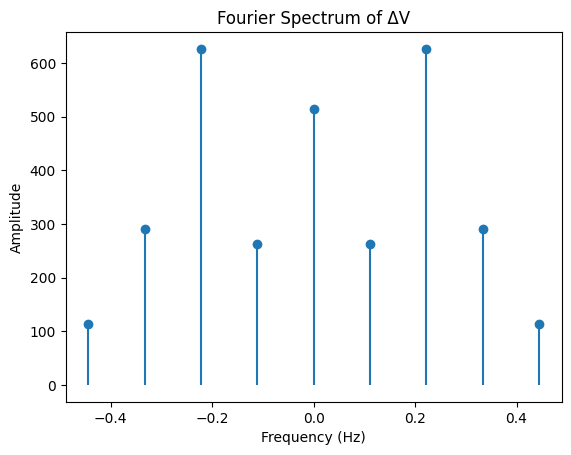

In [40]:
plt.subplot()
plt.stem(freq, mag_v, basefmt=" ")
plt.title("Fourier Spectrum of ΔV")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

ΔH Time Domain

Text(0, 0.5, 'ΔH')

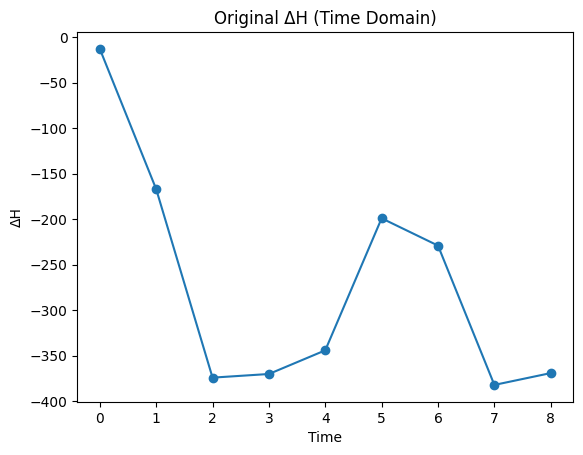

In [42]:
plt.subplot()
plt.plot(t, delta_h, marker='o')
plt.title("Original ΔH (Time Domain)")
plt.xlabel("Time")
plt.ylabel("ΔH")

ΔH Time to Frequency Conversion

Text(0, 0.5, 'Amplitude')

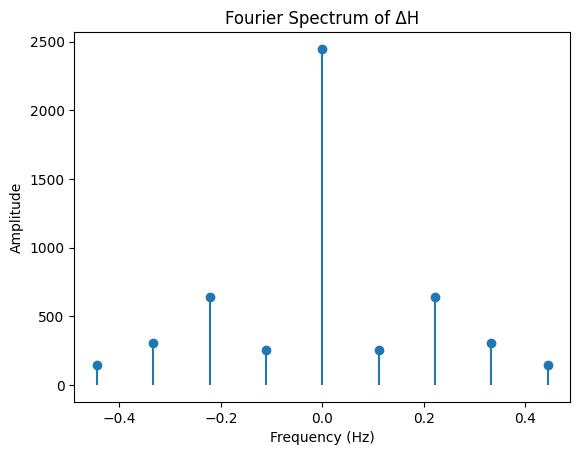

In [43]:
plt.subplot()
plt.stem(freq, mag_h, basefmt=" ")
plt.title("Fourier Spectrum of ΔH")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

### **Signal filtering based on frequency components**

We'll implement a basic low-pass filter by keeping only the lowest frequency components and zeroing out the rest.

Text(0, 0.5, 'Filtered ΔV')

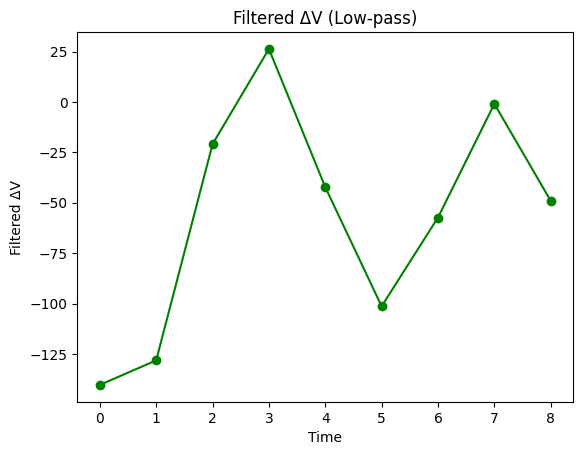

In [45]:
# Copy original FFT for filtering
filtered_fft_v = np.copy(fft_v)
filtered_fft_h = np.copy(fft_h)

# Keep only the first 3 components (low frequencies)
filtered_fft_v[3:] = 0
filtered_fft_h[3:] = 0

# Reconstruct filtered signal from modified FFT
filtered_v = np.real(ifft(filtered_fft_v))
filtered_h = np.real(ifft(filtered_fft_h))

plt.subplot()
plt.plot(t, filtered_v, marker='o', color='green')
plt.title("Filtered ΔV (Low-pass)")
plt.xlabel("Time")
plt.ylabel("Filtered ΔV")



ΔH Filtered frequency

Text(0, 0.5, 'Filtered ΔH')

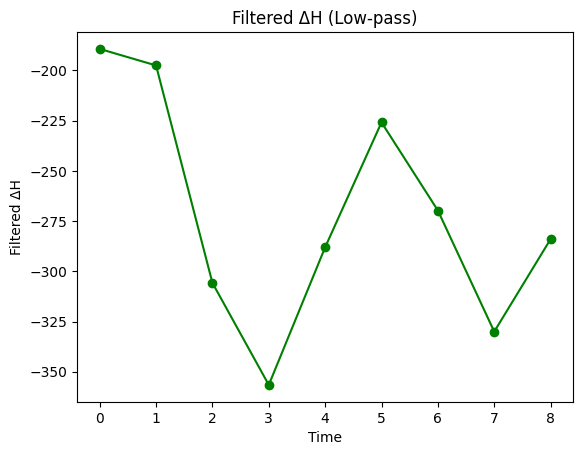

In [46]:
plt.subplot()
plt.plot(t, filtered_h, marker='o', color='green')
plt.title("Filtered ΔH (Low-pass)")
plt.xlabel("Time")
plt.ylabel("Filtered ΔH")

# **Laplace Transform Application**


In [ ]:
!pip install control

### **Implementation of control system models using laplace domain**

Here's a second-order system transfer function for defining in the Laplace Domain

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Transfer function: G(s) = 1 / (0.5s^2 + s + 1)
num = [1]
den = [0.5, 1, 1]


### **Step response and stability process**

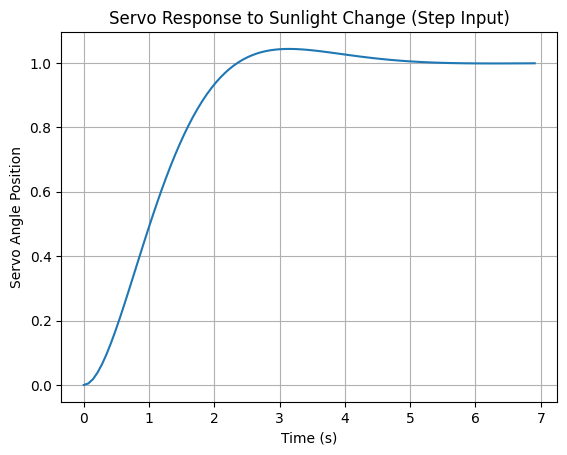

In [50]:
G = ctrl.TransferFunction(num, den)

# Step input simulating a sudden change in sunlight
t, y = ctrl.step_response(G)

plt.plot(t, y)
plt.title("Servo Response to Sunlight Change (Step Input)")
plt.xlabel("Time (s)")
plt.ylabel("Servo Angle Position")
plt.grid(True)
plt.show()